In [1]:
from tensorflow import function, GradientTape, sqrt, abs, reduce_mean, ones_like, zeros_like, convert_to_tensor,float32
from tensorflow import data as tfdata
from tensorflow import config as tfconfig
from tensorflow import nn
from tensorflow.keras import Model, Sequential, Input
from tensorflow.keras.layers import GRU, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError



In [2]:
import numpy as np
from tqdm import tqdm, trange
import pandas as pd

In [3]:
path = r"C:\Users\Asus\Desktop\CHemtech\data_pi.csv"

df = pd.read_csv(path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60510 entries, 0 to 60509
Data columns (total 2 columns):
timestamp    60510 non-null object
PI_71        60510 non-null float64
dtypes: float64(1), object(1)
memory usage: 945.6+ KB


In [5]:
df

,timestamp,PI_71
0,2020-04-27 15:30:00,272.0000
1,2020-04-27 16:30:00,272.0000
2,2020-04-27 19:30:00,272.0000
3,2020-04-27 20:30:00,272.0000
4,2020-04-27 21:30:00,272.0000
...,...,...
60505,2020-08-05 19:13:45,327.6910
60506,2020-08-05 19:14:51,327.9803
60507,2020-08-05 19:15:28,327.9803
60508,2020-08-05 19:16:10,328.1250


In [6]:
df.isna().sum()

timestamp    0
PI_71        0
dtype: int64

In [7]:
df.iloc[:,1].plot(kind ='hist', figsize = (15,10), grid = True)

In [8]:
df.columns

Index(['timestamp', 'PI_71'], dtype='object')

In [9]:
df['timestamp'] =  pd.to_datetime(df['timestamp'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60510 entries, 0 to 60509
Data columns (total 2 columns):
timestamp    60510 non-null datetime64[ns]
PI_71        60510 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 945.6 KB


In [11]:
df.describe()

,PI_71
count,60510.000000
mean,279.636115
std,76.820794
min,70.023150
25%,244.502300
50%,278.790500
75%,321.759200
max,756.221100


In [12]:
df.index = df.timestamp

In [13]:
df

,timestamp,PI_71
timestamp,,
2020-04-27 15:30:00,2020-04-27 15:30:00,272.0000
2020-04-27 16:30:00,2020-04-27 16:30:00,272.0000
2020-04-27 19:30:00,2020-04-27 19:30:00,272.0000
2020-04-27 20:30:00,2020-04-27 20:30:00,272.0000
2020-04-27 21:30:00,2020-04-27 21:30:00,272.0000
...,...,...
2020-08-05 19:13:45,2020-08-05 19:13:45,327.6910
2020-08-05 19:14:51,2020-08-05 19:14:51,327.9803
2020-08-05 19:15:28,2020-08-05 19:15:28,327.9803


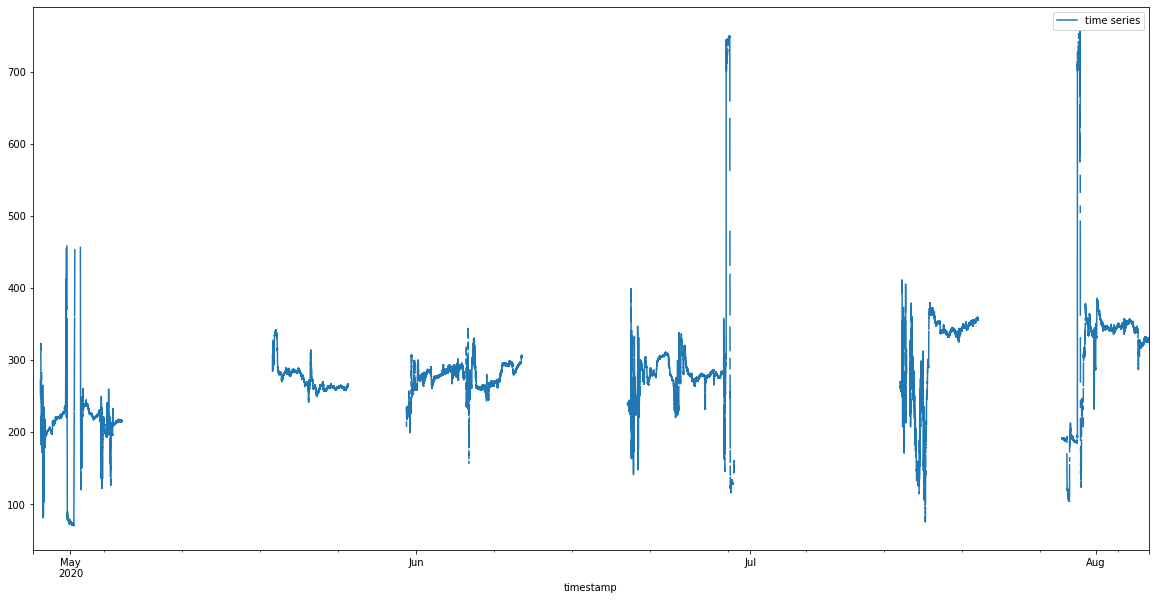

In [14]:
import matplotlib.pyplot as plt

# Check out of train and test data sets
fig, ax = plt.subplots(figsize = (20,10))
df_day = df.resample('1T')['PI_71'].first()

ax = df_day.plot(label = 'time series', grid =True)

#gr_day_test.plot(color='r',label = 'test')
ax.legend()
#ax.axvline(train.index.max(),linestyle = '--',color = 'r')
plt.grid()


In [19]:
#! pip install ydata-synthetic
! pip install --upgrade tensorflow --user

  Using cached https://files.pythonhosted.org/packages/68/8c/42bbb31a25a708e2e24881724ec7bcea05530492de8b1a2e0d8fe43eb2f6/tensorflow-2.4.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/74/7e/622d9849abf3afb81e482ffc170758742e392ee129ce1540611199a59237/tensorflow_estimator-2.4.0-py2.py3-none-any.whl


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [21]:
! pip install ydata-synthetic --user

  Using cached https://files.pythonhosted.org/packages/55/68/092661d180df25049b2ca027b3b7ba2ac96994764dec9f6a68cf14a83f7b/ydata_synthetic-0.2.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f1/3f/da5b5aac6c43b15d32458948725069324451831a94e386a2a29dfeac18b4/pandas-1.2.3-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/68/ad/6c2406ae175f59ec616714e408979b674fe27b9587f79d59a528ddfbcd5b/seaborn-0.11.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/81/51/dadfa4433ec13d9966393b1726a5c22d7773433aa7797b48980965f32e07/matplotlib-3.3.2-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/db/e3/6e6d1cb10b6736ceb1693f6ad8f8f979a3c8a101e9b20c4fd1a1613d3a76/pmlb-1.0.1.post3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/66/7a/9f3a49dea61e98ac8bd3b6b619da4fcb59053232a6e11e9e865dab7c16e0/PyYAML-5.4.1-cp37-cp37m-win_amd64.whl


In [22]:
#Importing the required libs for the exercise

from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import  ydata_synthetic.preprocessing.timeseries 
from ydata_synthetic.synthesizers.timeseries import TimeGAN


In [23]:
#Specific to TimeGANs
seq_len=24
n_seq = 1
hidden_dim=24
gamma=1

noise_dim = 32
dim = 128
batch_size = 128

log_step = 100
learning_rate = 5e-4

gan_args = [batch_size, learning_rate, noise_dim, 24, 2, (0, 1), dim]

In [30]:
#df = df.copy().drop('timestamp', axis=1)


In [29]:
df

,PI_71
timestamp,
2020-04-27 15:30:00,272.0000
2020-04-27 16:30:00,272.0000
2020-04-27 19:30:00,272.0000
2020-04-27 20:30:00,272.0000
2020-04-27 21:30:00,272.0000
...,...
2020-08-05 19:13:45,327.6910
2020-08-05 19:14:51,327.9803
2020-08-05 19:15:28,327.9803


In [33]:
from ydata_synthetic.preprocessing.timeseries.utils import real_data_loading

In [36]:
procceses_data = real_data_loading(df.values, seq_len= seq_len)
print(len(procceses_data ),procceses_data[0].shape)

60486 (24, 1)


In [40]:
synth = TimeGAN(model_parameters=gan_args, hidden_dim=24, seq_len=seq_len, n_seq=n_seq, gamma=1)
synth.train(procceses_data , train_steps=100)
synth.save('synthesizer_PI_71.pkl')



Emddeding network training:   0%|                                                              | 0/100 [00:00<?, ?it/s]

Emddeding network training:   1%|▌                                                     | 1/100 [00:09<15:17,  9.27s/it]

Emddeding network training:   2%|█                                                     | 2/100 [00:12<11:57,  7.32s/it]

Emddeding network training:   3%|█▌                                                    | 3/100 [00:15<09:52,  6.10s/it]

Emddeding network training:   4%|██▏                                                   | 4/100 [00:17<08:04,  5.04s/it]

Emddeding network training:   5%|██▋                                                   | 5/100 [00:20<06:58,  4.41s/it]

Emddeding network training:   6%|███▏                                                  | 6/100 [00:23<06:14,  3.98s/it]

Emddeding network training:   7%|███▊                                                  | 7/100 [00:26<05:39,  3.65s/it]

Emddeding network training:   

Emddeding network training:  67%|███████████████████████████████████▌                 | 67/100 [03:39<01:43,  3.13s/it]

Emddeding network training:  68%|████████████████████████████████████                 | 68/100 [03:43<01:52,  3.51s/it]

Emddeding network training:  69%|████████████████████████████████████▌                | 69/100 [03:48<01:58,  3.82s/it]

Emddeding network training:  70%|█████████████████████████████████████                | 70/100 [03:50<01:41,  3.39s/it]

Emddeding network training:  71%|█████████████████████████████████████▋               | 71/100 [03:53<01:32,  3.19s/it]

Emddeding network training:  72%|██████████████████████████████████████▏              | 72/100 [03:56<01:32,  3.29s/it]

Emddeding network training:  73%|██████████████████████████████████████▋              | 73/100 [03:59<01:26,  3.22s/it]

Emddeding network training:  74%|███████████████████████████████████████▏             | 74/100 [04:05<01:42,  3.95s/it]

Emddeding network training:  75%



Supervised network training:   1%|▌                                                    | 1/100 [00:06<11:11,  6.79s/it]

Supervised network training:   2%|█                                                    | 2/100 [00:09<09:04,  5.56s/it]

Supervised network training:   3%|█▌                                                   | 3/100 [00:12<07:52,  4.87s/it]

Supervised network training:   4%|██                                                   | 4/100 [00:15<06:51,  4.29s/it]

Supervised network training:   5%|██▋                                                  | 5/100 [00:18<06:13,  3.93s/it]

Supervised network training:   6%|███▏                                                 | 6/100 [00:21<05:26,  3.47s/it]

Supervised network training:   7%|███▋                                                 | 7/100 [00:24<05:21,  3.46s/it]

Supervised network training:   8%|████▏                                                | 8/100 [00:27<04:58,  3.24s/it]

Supervised network training:  

Supervised network training:  68%|███████████████████████████████████▎                | 68/100 [03:50<01:38,  3.09s/it]

Supervised network training:  69%|███████████████████████████████████▉                | 69/100 [03:53<01:39,  3.22s/it]

Supervised network training:  70%|████████████████████████████████████▍               | 70/100 [04:01<02:19,  4.66s/it]

Supervised network training:  71%|████████████████████████████████████▉               | 71/100 [04:04<01:55,  3.98s/it]

Supervised network training:  72%|█████████████████████████████████████▍              | 72/100 [04:07<01:45,  3.76s/it]

Supervised network training:  73%|█████████████████████████████████████▉              | 73/100 [04:10<01:34,  3.49s/it]

Supervised network training:  74%|██████████████████████████████████████▍             | 74/100 [04:15<01:47,  4.15s/it]

Supervised network training:  75%|███████████████████████████████████████             | 75/100 [04:21<01:56,  4.64s/it]

Supervised network training:  76

Joint networks training:  34%|███████████████████                                     | 34/100 [07:09<10:52,  9.89s/it]

Joint networks training:  35%|███████████████████▌                                    | 35/100 [07:19<10:49,  9.99s/it]

Joint networks training:  36%|████████████████████▏                                   | 36/100 [07:29<10:30,  9.85s/it]

Joint networks training:  37%|████████████████████▋                                   | 37/100 [07:41<11:11, 10.66s/it]

Joint networks training:  38%|█████████████████████▎                                  | 38/100 [07:51<10:52, 10.52s/it]

Joint networks training:  39%|█████████████████████▊                                  | 39/100 [08:02<10:32, 10.38s/it]

Joint networks training:  40%|██████████████████████▍                                 | 40/100 [08:11<10:12, 10.21s/it]

Joint networks training:  41%|██████████████████████▉                                 | 41/100 [08:21<09:57, 10.12s/it]

Joint networks training:  42%|██

In [41]:
synth_data = synth.sample(len(procceses_data))
print(synth_data.shape)



Synthetic data generation:   0%|                                                               | 0/473 [00:00<?, ?it/s]

Synthetic data generation:   0%|                                                       | 1/473 [00:00<01:41,  4.66it/s]

Synthetic data generation:   0%|▏                                                      | 2/473 [00:00<01:40,  4.69it/s]

Synthetic data generation:   1%|▎                                                      | 3/473 [00:00<01:38,  4.78it/s]

Synthetic data generation:   1%|▍                                                      | 4/473 [00:00<01:35,  4.92it/s]

Synthetic data generation:   1%|▌                                                      | 5/473 [00:01<01:34,  4.97it/s]

Synthetic data generation:   1%|▋                                                      | 6/473 [00:01<01:47,  4.34it/s]

Synthetic data generation:   1%|▊                                                      | 7/473 [00:01<01:50,  4.23it/s]

Synthetic data generation:   2

Synthetic data generation:  14%|███████▋                                              | 67/473 [00:14<01:20,  5.07it/s]

Synthetic data generation:  14%|███████▊                                              | 68/473 [00:14<01:19,  5.09it/s]

Synthetic data generation:  15%|███████▉                                              | 69/473 [00:14<01:19,  5.11it/s]

Synthetic data generation:  15%|███████▉                                              | 70/473 [00:15<01:18,  5.13it/s]

Synthetic data generation:  15%|████████                                              | 71/473 [00:15<01:18,  5.15it/s]

Synthetic data generation:  15%|████████▏                                             | 72/473 [00:15<01:17,  5.17it/s]

Synthetic data generation:  15%|████████▎                                             | 73/473 [00:15<01:20,  4.94it/s]

Synthetic data generation:  16%|████████▍                                             | 74/473 [00:15<01:20,  4.98it/s]

Synthetic data generation:  16%|

Synthetic data generation:  28%|███████████████                                      | 134/473 [00:27<01:05,  5.21it/s]

Synthetic data generation:  29%|███████████████▏                                     | 135/473 [00:27<01:04,  5.23it/s]

Synthetic data generation:  29%|███████████████▏                                     | 136/473 [00:27<01:03,  5.29it/s]

Synthetic data generation:  29%|███████████████▎                                     | 137/473 [00:27<01:03,  5.27it/s]

Synthetic data generation:  29%|███████████████▍                                     | 138/473 [00:28<01:03,  5.27it/s]

Synthetic data generation:  29%|███████████████▌                                     | 139/473 [00:28<01:02,  5.31it/s]

Synthetic data generation:  30%|███████████████▋                                     | 140/473 [00:28<01:02,  5.32it/s]

Synthetic data generation:  30%|███████████████▊                                     | 141/473 [00:28<01:02,  5.28it/s]

Synthetic data generation:  30%|

Synthetic data generation:  42%|██████████████████████▌                              | 201/473 [00:40<00:52,  5.22it/s]

Synthetic data generation:  43%|██████████████████████▋                              | 202/473 [00:40<00:51,  5.22it/s]

Synthetic data generation:  43%|██████████████████████▋                              | 203/473 [00:40<00:51,  5.22it/s]

Synthetic data generation:  43%|██████████████████████▊                              | 204/473 [00:40<00:51,  5.24it/s]

Synthetic data generation:  43%|██████████████████████▉                              | 205/473 [00:41<00:50,  5.27it/s]

Synthetic data generation:  44%|███████████████████████                              | 206/473 [00:41<00:51,  5.21it/s]

Synthetic data generation:  44%|███████████████████████▏                             | 207/473 [00:41<00:51,  5.21it/s]

Synthetic data generation:  44%|███████████████████████▎                             | 208/473 [00:41<00:50,  5.23it/s]

Synthetic data generation:  44%|

Synthetic data generation:  57%|██████████████████████████████                       | 268/473 [00:53<00:38,  5.27it/s]

Synthetic data generation:  57%|██████████████████████████████▏                      | 269/473 [00:53<00:38,  5.28it/s]

Synthetic data generation:  57%|██████████████████████████████▎                      | 270/473 [00:53<00:38,  5.25it/s]

Synthetic data generation:  57%|██████████████████████████████▎                      | 271/473 [00:53<00:38,  5.26it/s]

Synthetic data generation:  58%|██████████████████████████████▍                      | 272/473 [00:53<00:38,  5.25it/s]

Synthetic data generation:  58%|██████████████████████████████▌                      | 273/473 [00:54<00:37,  5.28it/s]

Synthetic data generation:  58%|██████████████████████████████▋                      | 274/473 [00:54<00:37,  5.28it/s]

Synthetic data generation:  58%|██████████████████████████████▊                      | 275/473 [00:54<00:37,  5.28it/s]

Synthetic data generation:  58%|

Synthetic data generation:  71%|█████████████████████████████████████▌               | 335/473 [01:05<00:26,  5.18it/s]

Synthetic data generation:  71%|█████████████████████████████████████▋               | 336/473 [01:06<00:26,  5.21it/s]

Synthetic data generation:  71%|█████████████████████████████████████▊               | 337/473 [01:06<00:25,  5.25it/s]

Synthetic data generation:  71%|█████████████████████████████████████▊               | 338/473 [01:06<00:25,  5.21it/s]

Synthetic data generation:  72%|█████████████████████████████████████▉               | 339/473 [01:06<00:26,  5.10it/s]

Synthetic data generation:  72%|██████████████████████████████████████               | 340/473 [01:06<00:26,  4.94it/s]

Synthetic data generation:  72%|██████████████████████████████████████▏              | 341/473 [01:07<00:26,  5.03it/s]

Synthetic data generation:  72%|██████████████████████████████████████▎              | 342/473 [01:07<00:25,  5.12it/s]

Synthetic data generation:  73%|

Synthetic data generation:  85%|█████████████████████████████████████████████        | 402/473 [01:18<00:13,  5.24it/s]

Synthetic data generation:  85%|█████████████████████████████████████████████▏       | 403/473 [01:18<00:13,  5.26it/s]

Synthetic data generation:  85%|█████████████████████████████████████████████▎       | 404/473 [01:19<00:13,  5.24it/s]

Synthetic data generation:  86%|█████████████████████████████████████████████▍       | 405/473 [01:19<00:12,  5.26it/s]

Synthetic data generation:  86%|█████████████████████████████████████████████▍       | 406/473 [01:19<00:12,  5.24it/s]

Synthetic data generation:  86%|█████████████████████████████████████████████▌       | 407/473 [01:19<00:12,  5.25it/s]

Synthetic data generation:  86%|█████████████████████████████████████████████▋       | 408/473 [01:19<00:12,  5.26it/s]

Synthetic data generation:  86%|█████████████████████████████████████████████▊       | 409/473 [01:20<00:12,  5.26it/s]

Synthetic data generation:  87%|

Synthetic data generation:  99%|████████████████████████████████████████████████████▌| 469/473 [01:31<00:00,  5.24it/s]

Synthetic data generation:  99%|████████████████████████████████████████████████████▋| 470/473 [01:31<00:00,  4.98it/s]

Synthetic data generation: 100%|████████████████████████████████████████████████████▊| 471/473 [01:31<00:00,  5.07it/s]

Synthetic data generation: 100%|████████████████████████████████████████████████████▉| 472/473 [01:32<00:00,  5.12it/s]

Synthetic data generation: 100%|█████████████████████████████████████████████████████| 473/473 [01:32<00:00,  5.12it/s]


(60544, 24, 1)


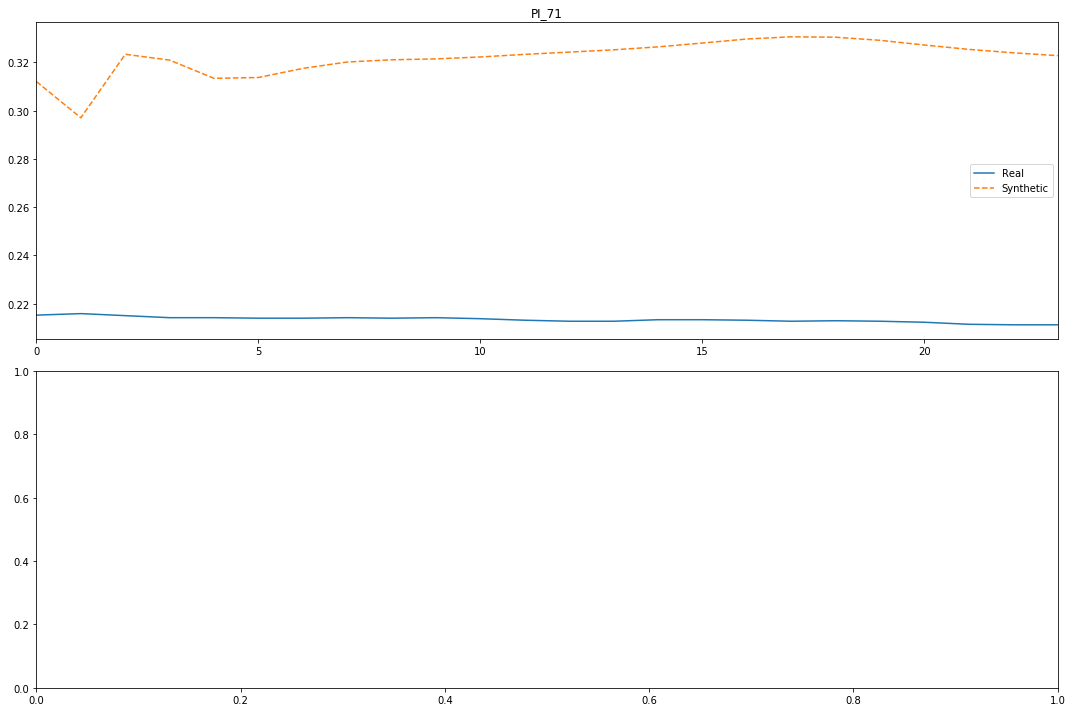

In [45]:
#Reshaping the data
cols = ['PI_71']

#Plotting some generated samples. Both Synthetic and Original data are still standartized with values between [0,1]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
axes=axes.flatten()

time = list(range(1,len(procceses_data)))
obs = np.random.randint(len(procceses_data))

for j, col in enumerate(cols):
    df = pd.DataFrame({'Real': procceses_data[obs][:, j],
                   'Synthetic': synth_data[obs][:, j]})
    df.plot(ax=axes[j],
            title = col,
            secondary_y='Synthetic data', style=['-', '--'])
fig.tight_layout()

In [46]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

sample_size = 250
idx = np.random.permutation(len(procceses_data))[:sample_size]

real_sample = np.asarray(procceses_data)[idx]
synthetic_sample = np.asarray(synth_data)[idx]

#for the purpose of comparision we need the data to be 2-Dimensional. For that reason we are going to use only two componentes for both the PCA and TSNE.
data_reduced = real_sample.reshape(-1, seq_len)
synth_data_reduced = np.asarray(synthetic_sample).reshape(-1,seq_len)

n_components = 2
pca = PCA(n_components=n_components)
tsne = TSNE(n_components=n_components, n_iter=300)

#The fit of the methods must be done only using the real sequential data
pca.fit(data_reduced)

pca_real = pd.DataFrame(pca.transform(data_reduced))
pca_synth = pd.DataFrame(pca.transform(synth_data_reduced))

data_reduced = np.concatenate((data_reduced, synth_data_reduced), axis=0)
tsne_results = pd.DataFrame(tsne.fit_transform(data_reduced))

Text(0.5, 0.98, 'Validating synthetic vs real data diversity and distributions')

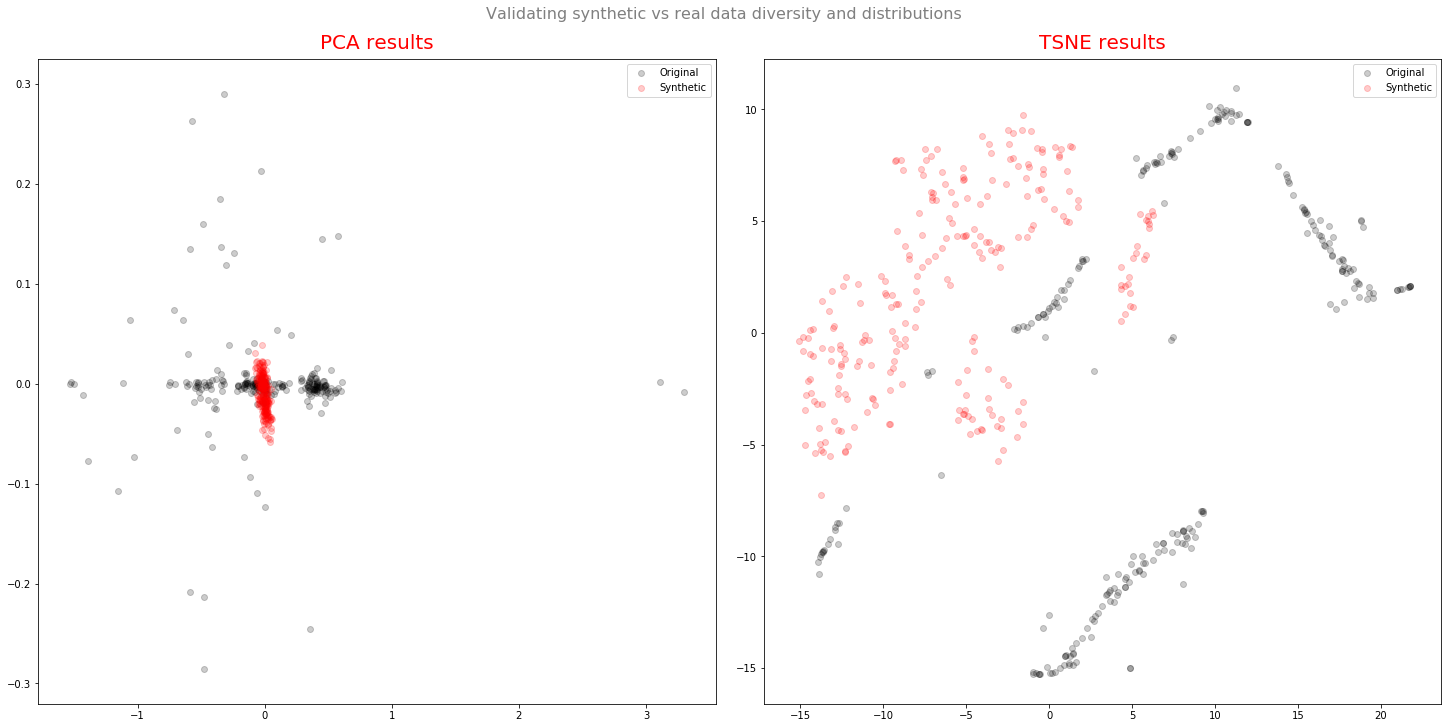

In [47]:
#The scatter plots for PCA and TSNE methods
import matplotlib.gridspec as gridspec
fig = plt.figure(constrained_layout=True, figsize=(20,10))
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

#TSNE scatter plot
ax = fig.add_subplot(spec[0,0])
ax.set_title('PCA results',
             fontsize=20,
             color='red',
             pad=10)

#PCA scatter plot
plt.scatter(pca_real.iloc[:, 0].values, pca_real.iloc[:,1].values,
            c='black', alpha=0.2, label='Original')
plt.scatter(pca_synth.iloc[:,0], pca_synth.iloc[:,1],
            c='red', alpha=0.2, label='Synthetic')
ax.legend()

ax2 = fig.add_subplot(spec[0,1])
ax2.set_title('TSNE results',
              fontsize=20,
              color='red',
              pad=10)

plt.scatter(tsne_results.iloc[:sample_size, 0].values, tsne_results.iloc[:sample_size,1].values,
            c='black', alpha=0.2, label='Original')
plt.scatter(tsne_results.iloc[sample_size:,0], tsne_results.iloc[sample_size:,1],
            c='red', alpha=0.2, label='Synthetic')

ax2.legend()

fig.suptitle('Validating synthetic vs real data diversity and distributions',
             fontsize=16,
             color='grey')

In [48]:
from tensorflow.keras import Input, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsoluteError

#First implement a simple RNN model for prediction
def RNN_regression(units):
    opt = Adam(name='AdamOpt')
    loss = MeanAbsoluteError(name='MAE')
    model = Sequential()
    model.add(GRU(units=units,
                  name=f'RNN_1'))
    model.add(Dense(units=6,
                    activation='sigmoid',
                    name='OUT'))
    model.compile(optimizer=opt, loss=loss)
    return model

In [50]:
#Prepare the dataset for the regression model
data=np.asarray(procceses_data)
synth_data = synth_data[:len(procceses_data)]
n_events = len(procceses_data)

#Split data on train and test
idx = np.arange(n_events)
n_train = int(.6*n_events)
train_idx = idx[:n_train]
test_idx = idx[n_train:]

#Define the X for synthetic and real data
X_train = procceses_data[train_idx, :seq_len-1, :]
X_synth_train = synth_data[train_idx, :seq_len-1, :]

X_test = procceses_data[test_idx, :seq_len-1, :]
y_test = procceses_data[test_idx, -1, :]

#Define the y for synthetic and real datasets
y_train = procceses_data[train_idx, -1, :]
y_synth_train = synth_data[train_idx, -1, :]

print('Synthetic X train: {}'.format(X_synth_train.shape))
print('Real X train: {}'.format(X_stock_train.shape))

print('Synthetic y train: {}'.format(y_synth_train.shape))
print('Real y train: {}'.format(y_stock_train.shape))

print('Real X test: {}'.format(X_stock_test.shape))
print('Real y test: {}'.format(y_stock_test.shape))

TypeError: list indices must be integers or slices, not tuple